<a href="https://colab.research.google.com/github/ZAIN007777/Deep-FeedForward-Neural-Network/blob/main/DeepFeedforwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Feedforward Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

##  Activation Functions & Derivatives

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

##  Binary Cross Entropy Loss

In [3]:
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8
    loss = -np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon)) / m
    return loss

##  Deep Neural Network Class

In [6]:
class DeepNeuralNetwork:
    def __init__(self, layer_dims, activation_funcs):
        self.layer_dims = layer_dims
        self.activation_funcs = activation_funcs
        self.parameters = {}
        self.L = len(layer_dims) - 1
        self.initialize_parameters()

    def initialize_parameters(self):
        for l in range(1, self.L + 1):
            self.parameters[f"W{l}"] = np.random.randn(
                self.layer_dims[l], self.layer_dims[l - 1]) * 0.01
            self.parameters[f"b{l}"] = np.zeros((self.layer_dims[l], 1))

    def forward_pass(self, X):
        A = X.T
        caches = []
        for l in range(1, self.L + 1):
            W = self.parameters[f"W{l}"]
            b = self.parameters[f"b{l}"]
            Z = np.dot(W, A) + b
            if self.activation_funcs[l - 1] == "sigmoid":
                A = sigmoid(Z)
            elif self.activation_funcs[l - 1] == "relu":
                A = relu(Z)
            elif self.activation_funcs[l - 1] == "tanh":
                A = tanh(Z)
            caches.append((A, Z, W, b))
        return A, caches

    def backward_pass(self, X, y, caches):
        grads = {}
        m = X.shape[0]
        y = y.reshape(1, m)
        A_last, Z_last, _, _ = caches[-1]
        dA = -(np.divide(y, A_last) - np.divide(1 - y, 1 - A_last))

        for l in reversed(range(1, self.L + 1)):
            A, Z, W, b = caches[l - 1]
            A_prev = X.T if l == 1 else caches[l - 2][0]

            if self.activation_funcs[l - 1] == "sigmoid":
                dZ = dA * sigmoid_derivative(Z)
            elif self.activation_funcs[l - 1] == "relu":
                dZ = dA * relu_derivative(Z)
            elif self.activation_funcs[l - 1] == "tanh":
                dZ = dA * tanh_derivative(Z)

            dW = (1 / m) * np.dot(dZ, A_prev.T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            dA = np.dot(W.T, dZ)

            grads[f"dW{l}"] = dW
            grads[f"db{l}"] = db
        return grads

    def update_parameters(self, grads, learning_rate):
        for l in range(1, self.L + 1):
            self.parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
            self.parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]

    def train(self, X, y, epochs, learning_rate, print_loss=True):
        losses = []
        for i in range(epochs):
            A, caches = self.forward_pass(X)
            loss = binary_cross_entropy(y, A.T)
            grads = self.backward_pass(X, y, caches)
            self.update_parameters(grads, learning_rate)
            losses.append(loss)
            if print_loss and i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        A, _ = self.forward_pass(X)
        return (A > 0.5).astype(int).T

## Generate & Visualize Dataset

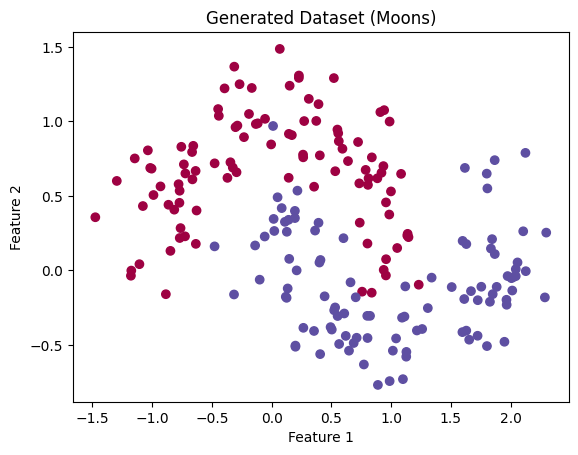

In [7]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.title("Generated Dataset (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Train the Neural Network

In [8]:
model = DeepNeuralNetwork([2, 20, 10, 1], ['relu', 'relu', 'sigmoid'])
losses = model.train(X, y, epochs=1000, learning_rate=0.1)

Epoch 0, Loss: 138.6294
Epoch 100, Loss: 138.6294
Epoch 200, Loss: 138.6294
Epoch 300, Loss: 138.6294
Epoch 400, Loss: 138.6294
Epoch 500, Loss: 138.6294
Epoch 600, Loss: 138.6294
Epoch 700, Loss: 138.6294
Epoch 800, Loss: 138.6294
Epoch 900, Loss: 138.6294


## Training Loss

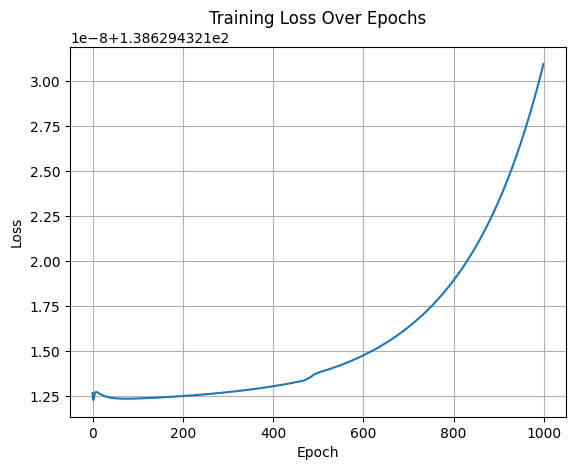

In [9]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Decision Boundary

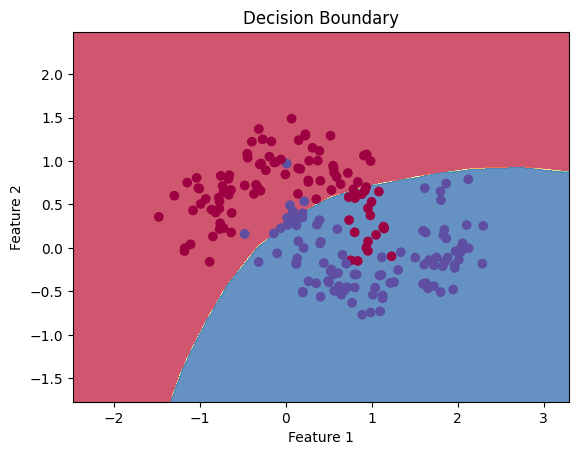

In [10]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(model, X, y)

## Accuracy

In [11]:
preds = model.predict(X)
accuracy = np.mean(preds.flatten() == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 84.50%
